In [19]:
#IMPORTANDO LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import joblib

Repositorio:
[GitHub|SPRINT-3](https://github.com/santiagomalak/SPRINT_3)

In [6]:
#CARGA DE ARCHIVOS EXCEL
df = pd.read_excel("C:\\pratics\\Data_Science\\Dataset\\clustering_mailing.xlsx", sheet_name="Sheet1")

In [7]:
#EXPLORACION INICIAL DE LOS ARCHIVOS 
df.head()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17.000000,3.500000
1,633731,1,0,0,0,1,0,21.000000,4.000000
2,1537126,4,0,0,0,4,0,17.000000,3.500000
3,1960135,3,0,0,0,3,0,15.333333,3.333333
4,1004992,8,0,1,0,10,1,18.222222,2.000000


In [8]:
df.info

<bound method DataFrame.info of              Id  send  bounce  open  click  Total  Comprador       hour  \
0       2044163     4       0     0      0      4          0  17.000000   
1        633731     1       0     0      0      1          0  21.000000   
2       1537126     4       0     0      0      4          0  17.000000   
3       1960135     3       0     0      0      3          0  15.333333   
4       1004992     8       0     1      0     10          1  18.222222   
...         ...   ...     ...   ...    ...    ...        ...        ...   
212287  1996785     4       0     0      0      4          0  17.000000   
212288  1485221     1       1     0      0      2          0  19.000000   
212289  1521848     1       0     0      0      1          0  19.000000   
212290  2001602     5       0     0      0      5          1  20.200000   
212291    65824     9       0     9      1     19          1  14.105263   

        day_of_week  
0          3.500000  
1          4.000000  
2

In [9]:
df.describe()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
count,2.122920e+05,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000
mean,1.062074e+06,3.757801,0.264273,0.483819,0.072108,4.680077,0.616542,18.506052,2.467164
std,6.119871e+05,3.838834,0.665326,1.564734,0.607759,4.964009,0.486229,3.078170,1.208796
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.336052e+05,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,17.000000,1.500000
50%,1.062491e+06,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,19.600000,2.333333
75%,1.592284e+06,5.000000,0.000000,0.000000,0.000000,6.000000,1.000000,20.666667,3.500000
max,2.122907e+06,167.000000,55.000000,174.000000,106.000000,390.000000,1.000000,23.000000,6.000000


In [10]:
#ELIMINAR NULOS
df.dropna()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17.000000,3.500000
1,633731,1,0,0,0,1,0,21.000000,4.000000
2,1537126,4,0,0,0,4,0,17.000000,3.500000
3,1960135,3,0,0,0,3,0,15.333333,3.333333
4,1004992,8,0,1,0,10,1,18.222222,2.000000
...,...,...,...,...,...,...,...,...,...
212287,1996785,4,0,0,0,4,0,17.000000,3.500000
212288,1485221,1,1,0,0,2,0,19.000000,4.000000
212289,1521848,1,0,0,0,1,0,19.000000,4.000000
212290,2001602,5,0,0,0,5,1,20.200000,1.400000


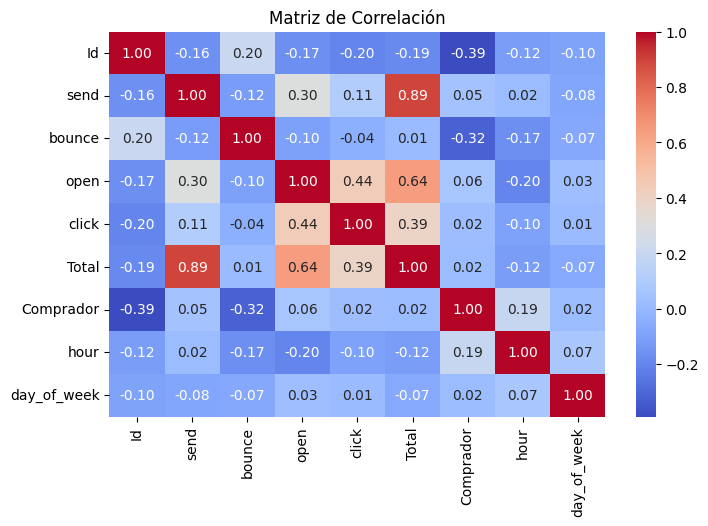

In [11]:
#VISUALIZACION
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# Creación de una nueva variable: Engagement Score
#Objetivo : Capturar el nivel de interacción de los clientes con la campaña de correo electrónico.
df["engagement_score"] = df["open"] + (df["click"] * 2) + (df["Comprador"] * 3)

In [13]:
# Selección de variables para clustering
features = ["send", "bounce", "open", "click", "Total", "hour", "day_of_week", "engagement_score"]
X = df[features]

In [14]:
# Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '8' # Reemplaza 4 con el número de núcleos que deseas usar

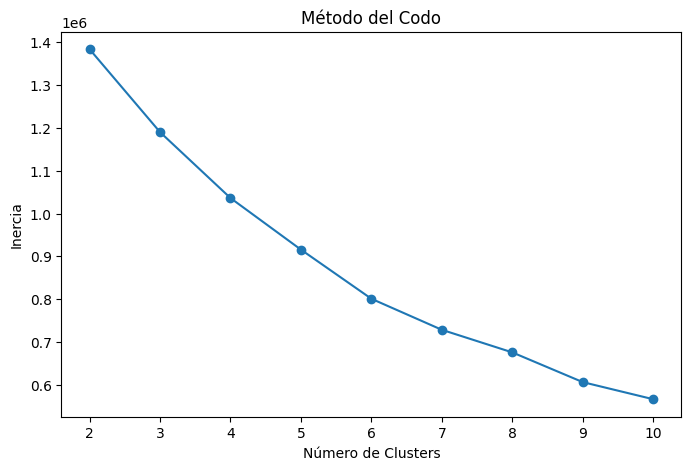

In [20]:
# Determinar número óptimo de clusters - Método del Codo
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [21]:
print(np.isnan(X_scaled).sum())  # Verifica si hay valores NaN

0


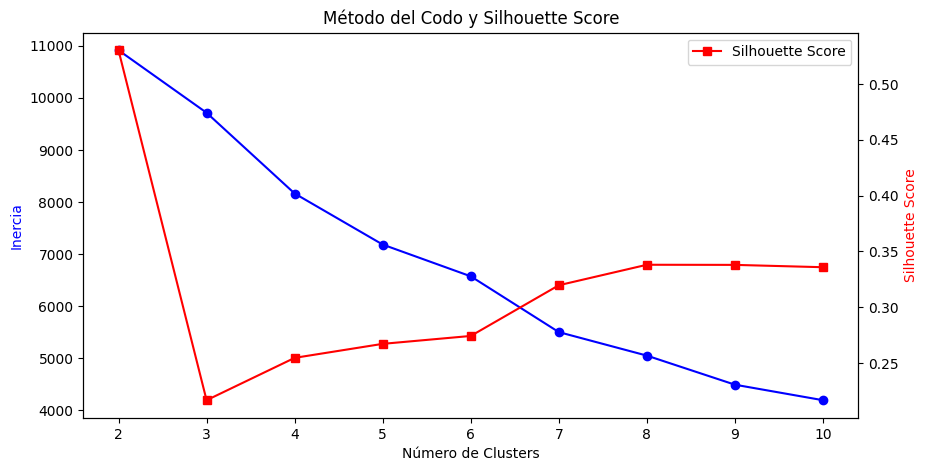

In [22]:
# 8. Determinar número óptimo de clusters con una muestra para optimizar rendimiento
sample_size = min(2000, len(X_scaled))
X_sample = X_scaled[np.random.choice(len(X_scaled), sample_size, replace=False)]

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256)
    kmeans.fit(X_sample)
    inertia.append(kmeans.inertia_)
    labels = kmeans.predict(X_sample)
    silhouette_scores.append(silhouette_score(X_sample, labels))

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(k_range, inertia, marker='o', label='Inercia', color='blue')
ax2.plot(k_range, silhouette_scores, marker='s', label='Silhouette Score', color='red')
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inercia', color='blue')
ax2.set_ylabel('Silhouette Score', color='red')
plt.title('Método del Codo y Silhouette Score')
plt.legend()
plt.show()


C:\Users\santi\AppData\Local\Temp\ipykernel_23812\3392581829.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["cluster"], y=df["silhouette_score"], palette="muted")


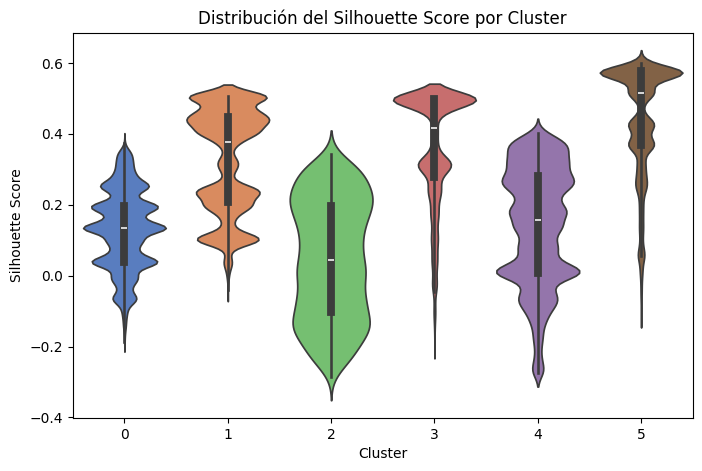

In [23]:
# 9. Evaluar la distribución del Silhouette Score por cluster
k_optimo = 6  # Ajustar según el gráfico
total_kmeans = MiniBatchKMeans(n_clusters=k_optimo, random_state=42, batch_size=256)
df["cluster"] = total_kmeans.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, df["cluster"])
df["silhouette_score"] = silhouette_vals

plt.figure(figsize=(8, 5))
sns.violinplot(x=df["cluster"], y=df["silhouette_score"], palette="muted")
plt.xlabel("Cluster")
plt.ylabel("Silhouette Score")
plt.title("Distribución del Silhouette Score por Cluster")
plt.show()

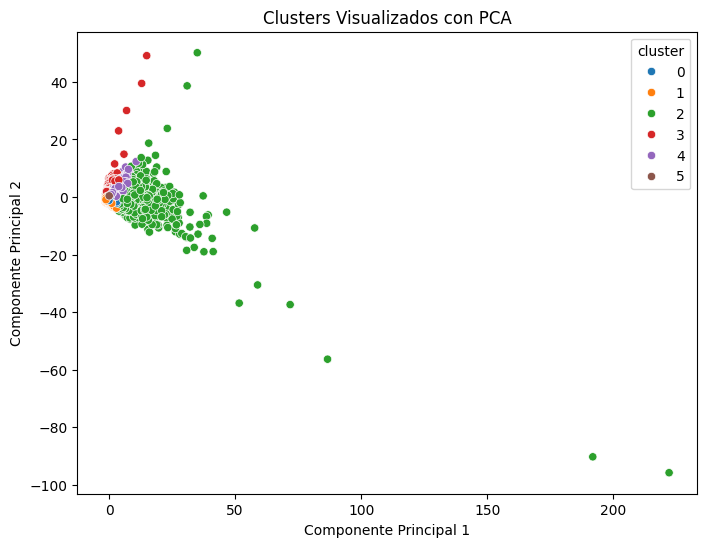

In [24]:
# 10. Visualización de clusters con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["pca1"], y=df["pca2"], hue=df["cluster"], palette='tab10')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters Visualizados con PCA')
plt.show()

In [25]:
# 11. Interpretación y Recomendaciones
cluster_summary = df.groupby("cluster").mean()
print(cluster_summary)

                   Id       send    bounce      open     click      Total  \
cluster                                                                     
0        1.173345e+06   2.872624  0.015528  0.815846  0.083532   3.898583   
1        1.007223e+06   1.725103  0.295049  0.085140  0.005367   2.110659   
2        2.797590e+05  11.632721  0.065682  7.807773  2.362157  23.241338   
3        1.458610e+06   1.765785  1.552315  0.020960  0.001417   3.522077   
4        9.051912e+05   9.112089  0.020718  0.771376  0.069884  10.183183   
5        1.050911e+06   2.513832  0.032824  0.203587  0.024675   2.777450   

         Comprador       hour  day_of_week  engagement_score  \
cluster                                                        
0         0.582133  15.543550     3.446283          2.729308   
1         0.593155  20.949860     3.584498          1.875338   
2         0.721000  15.532575     2.507889         14.695089   
3         0.151963  13.792865     1.604461          0.479684   

Análisis de los clusters:

Cluster 0:
send bajo, bounce bajo, open alto, click bajo, engagement_score moderado.
Usuarios que abren correos pero interactúan poco.

Cluster 1:
send bajo, bounce alto, open bajo, click muy bajo, engagement_score bajo.
Usuarios poco comprometidos con altas tasas de rebote.

Cluster 2:
send muy alto, bounce bajo, open muy alto, click moderado, engagement_score alto.
Usuarios altamente comprometidos con muchas aperturas e interacciones.

Cluster 3:
send bajo, bounce muy alto, open muy bajo, click muy bajo, engagement_score muy bajo.
Usuarios con tasas de rebote extremadamente altas y muy poco compromiso.

Cluster 4:
send moderado, bounce bajo, open bajo, click bajo, engagement_score bajo.
Usuarios con bajo compromiso general.

Cluster 5:
send bajo, bounce bajo, open bajo, click bajo, engagement_score moderado.
Usuarios con un compromiso moderado, similar al cluster 0.

In [26]:
# Posibles recomendaciones para marketing
for cluster_id, group in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}: ")
    if group["engagement_score"] > np.mean(df["engagement_score"]):
        print(" - Clientes altamente comprometidos. Sugerencia: Ofrecer promociones exclusivas.")
    else:
        print(" - Clientes de bajo compromiso. Sugerencia: Reenviar campañas de emails con incentivos.")
    print("\n")


Cluster 0: 
 - Clientes altamente comprometidos. Sugerencia: Ofrecer promociones exclusivas.


Cluster 1: 
 - Clientes de bajo compromiso. Sugerencia: Reenviar campañas de emails con incentivos.


Cluster 2: 
 - Clientes altamente comprometidos. Sugerencia: Ofrecer promociones exclusivas.


Cluster 3: 
 - Clientes de bajo compromiso. Sugerencia: Reenviar campañas de emails con incentivos.


Cluster 4: 
 - Clientes altamente comprometidos. Sugerencia: Ofrecer promociones exclusivas.


Cluster 5: 
 - Clientes altamente comprometidos. Sugerencia: Ofrecer promociones exclusivas.




Análisis de las recomendaciones:

Clusters 0, 2, 4 y 5: Se clasifican como "Clientes altamente comprometidos" y se sugiere ofrecer promociones exclusivas. Esto indica que estos clusters tienen un buen nivel de compromiso y podrían responder bien a ofertas especiales.

Clusters 1 y 3: Se clasifican como "Clientes de bajo compromiso" y se sugiere reenviar campañas de emails con incentivos. Esto indica que estos clusters necesitan estrategias para aumentar su participación y podrían beneficiarse de incentivos para interactuar con los correos electrónicos.

Recomendaciones de marketing:

Clientes altamente comprometidos:
Ofrecer promociones exclusivas y personalizadas.
Implementar programas de fidelización.
Solicitar comentarios y opiniones para mantener su compromiso.

Clientes de bajo compromiso:
Reenviar campañas de emails con incentivos (descuentos, contenido exclusivo, etc.).
Realizar encuestas o entrevistas para entender sus intereses.
Segmentar aún más este grupo para personalizar el contenido.

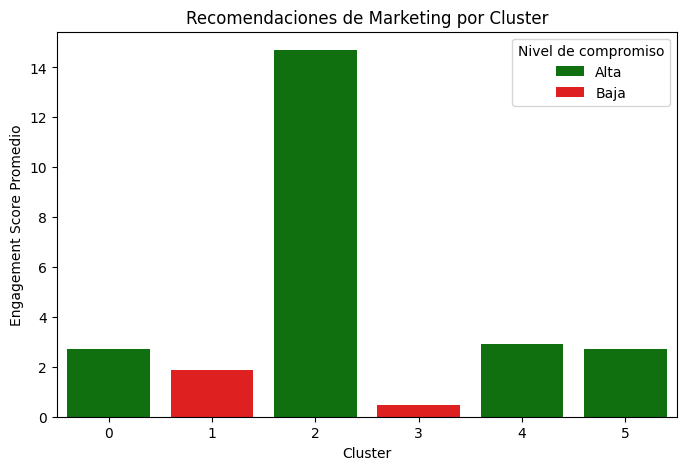

In [27]:
# Posibles recomendaciones para marketing
recomendaciones = []
for cluster_id, group in cluster_summary.iterrows():
    if group["engagement_score"] > np.mean(df["engagement_score"]):
        recomendaciones.append("Alta");
    else:
        recomendaciones.append("Baja");

df_recomendaciones = pd.DataFrame({
    "Cluster": cluster_summary.index,
    "Nivel de compromiso": recomendaciones
})

plt.figure(figsize=(8, 5))
sns.barplot(x=df_recomendaciones["Cluster"], y=cluster_summary["engagement_score"], hue=df_recomendaciones["Nivel de compromiso"], palette={"Alta": "green", "Baja": "red"})
plt.xlabel("Cluster")
plt.ylabel("Engagement Score Promedio")
plt.title("Recomendaciones de Marketing por Cluster")
plt.legend(title="Nivel de compromiso")
plt.show()

In [32]:
# 12. Guardar el modelo para uso futuro
joblib.dump(total_kmeans, "C:\\pratics\\Data_Science\\Proyects\\SPRINT-3\\Resultados\\modelo_clustering.pkl")
joblib.dump(scaler, "C:\\pratics\\Data_Science\\Proyects\\SPRINT-3\\Resultados\\scaler.pkl")

['C:\\pratics\\Data_Science\\Proyects\\SPRINT-3\\Resultados\\scaler.pkl']

In [33]:
# 13. Exportar resultados a Excel
with pd.ExcelWriter("C:\\pratics\\Data_Science\\Proyects\\SPRINT-3\\Resultados\\Resultados_Clustering.xlsx") as writer:
    df.to_excel(writer, sheet_name="Clusters", index=False)
    df_recomendaciones.to_excel(writer, sheet_name="Recomendaciones", index=False)

print("Archivo 'Resultados_Clustering.xlsx' y modelo guardados correctamente.")


Archivo 'Resultados_Clustering.xlsx' y modelo guardados correctamente.
